In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create random initial spins in an NxN array?
#Need to take into account the position of the spins

#Pick one random spin and flip it
#Calculate energy difference between the old and the new state
#If E_new > E_old: keep new state
#If E_new < E_old: calculate q = p(x')/p(x).
#Draw random number: if random number lower than q: accept new state

In [3]:
def initial_spins(N):
    spin_0 = np.random.choice([1,-1])
    lattice = np.random.choice([spin_0, -spin_0], size=(N,N), p=[0.8, 0.2])
    
    return lattice



# def system_energy(lattice, coupling_constant):
#     L = len(lattice[0,:])
#     ham = 0
#     for i in range(L):
#         for j in range(L):
#             h = 0
#             h = lattice[i,j]*lattice[(i-1)%L,j-1] + lattice[i,j]*lattice[(i-1)%L,(j+1)%L] + lattice[i,j]*lattice[(i+1)%L,(j+1)%L] + lattice[i,j]*lattice[(i+1)%L,(j-1)%L]
#             ham += h
#     total_energy = -coupling_constant*ham
#     return total_energy


def system_energy(lattice, J):
#     this method is way faster the the double for loop

    energy = -J * np.sum(lattice * (np.roll(lattice, -1, axis=0) + np.roll(lattice, -1, axis=1)))
    return energy




def energy_difference(old_lattice, new_lattice):
    delta_energy = total_hamiltonian(new_lattice) - total_hamiltonian(old_lattice)
    return delta_energy


def monte_carlo(lattice, coupling_constant, temperature):
    beta = 1/temperature
    size = len(lattice[0,:])
    random_x, random_y = np.random.randint(size, size=2)
    delta_E = 2 * coupling_constant * lattice[random_x, random_y] * (lattice[(random_x-1)%size, random_y] 
                                                              + lattice[(random_x+1)%size, random_y] 
                                                              + lattice[random_x, (random_y-1)%size] 
                                                              + lattice[random_x, (random_y+1)%size])
    if delta_E <= 0:
        lattice[random_x, random_y] *= -1
        return lattice, delta_E
    if np.random.rand() < np.exp(-delta_E * beta):
        lattice[random_x, random_y] *= -1
        return lattice, delta_E
    else:
        return lattice, 0

def show_snapshot(lattice, timestep):
    
    plt.imshow(lattice, cmap='binary')
    plt.title(f'Timestep {timestep}')
    plt.show()


def ising_simulation(size, coupling_constant, temperature, timesteps):
#     two metropolis algorithm starting from the same initial lattice
    lattice = initial_spins(size)
    lattice2 = np.copy(lattice)
    energies = []
    energies2 = []
    magnetizations = []
    magnetizations2 = []
    t_to_eq = 50000
    for i in range(timesteps + t_to_eq):
        lattice, delta_E = monte_carlo(lattice, coupling_constant, temperature) 
        lattice2, delta_E2 = monte_carlo(lattice2, coupling_constant, temperature)
        if i >= t_to_eq:
            energies.append(system_energy(lattice, coupling_constant)/size**2)
            magnetizations.append(np.sum(lattice)/size**2)
            energies2.append(system_energy(lattice2, coupling_constant)/size**2)
            magnetizations2.append(np.sum(lattice2)/size**2)
#             if i%1000 == 0:
#                 show_snapshot(lattice, i-t_to_eq)
                
    return np.array(energies), np.array(magnetizations), np.array(energies2), np.array(magnetizations2)

def auto_correlation(magnetization, timestep):
    xi = np.zeros(timestep)
    for t in range(timestep):
        xi[t] = (np.sum(magnetization[0:timestep-t]*magnetization[t:timestep])) * (timestep-t)**(-1) - (np.sum(magnetization[0:timestep-t])*np.sum(magnetization[t:timestep])) * (timestep-t)**(-2) 
        
    return xi

def corr_time(chi):
    i = 0
    integral = 0
    while chi[i] >= 0:
        integral += chi[i]/chi[0]
        i += 1
    return integral

In [4]:
#Define constants
n_spins = 50
coupling_constant = 1
temperature = 4.
n_steps = 70000

In [5]:
# Run the simulation
energies, magnetizations, energies2, magnetizations2 = ising_simulation(n_spins, coupling_constant, temperature, n_steps)

In [6]:
chi = auto_correlation(magnetizations, n_steps)

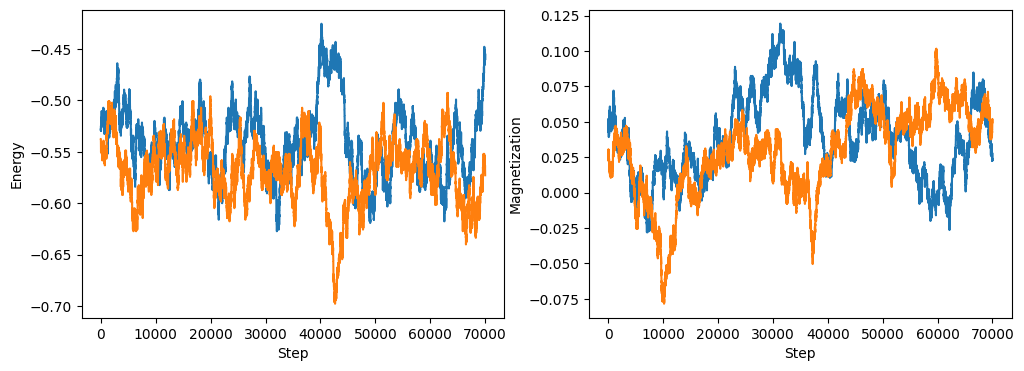

In [7]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(energies)
ax1.plot(energies2)
ax1.set_xlabel("Step")
ax1.set_ylabel("Energy")
ax2.plot(magnetizations)
ax2.plot(magnetizations2)
ax2.set_xlabel("Step")
ax2.set_ylabel("Magnetization")
plt.show()

Text(0, 0.5, 'Auto-correlation')

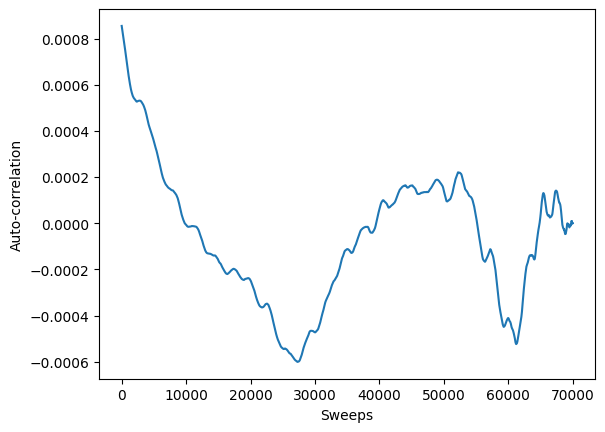

In [8]:
plt.plot(chi)
plt.xlabel('Sweeps')
plt.ylabel('Auto-correlation')

In [9]:
for i in range(len(chi)):
    if chi[i]<0:
        print(chi[i], i)
        break

-2.5982693003644836e-08 9793


In [10]:
tau = corr_time(chi)

print(tau)

4156.109637562588
